In [2]:
import h5py
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.animation import FuncAnimation
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from functools import reduce
from matplotlib import transforms
from functools import reduce

In [3]:
import matplotlib.pyplot as plt

In [8]:
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/U_avg.h5", "r") as file:
    U = file["matrix"][:]

In [9]:
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/V_avg.h5", "r") as file:
    V = file["matrix"][:]

with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/M_avg.h5", "r") as file:
    M = file["matrix"][:]
    
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/xgrid_matrix", "r") as file:
    xgrid = file["matrix"][:]
    
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/ygrid_matrix", "r") as file:
    ygrid = file["matrix"][:]

# Mean velocity development
Mean velocity over the filled area size

In [29]:
# size = 1024

# area_mean_M = np.zeros(total_t)
# for i in range(total_t):
#     area_mean_M[t] = np.sum(M[t])/size

In [30]:
# plt.figure(figsize=(10,4))
# plt.title("mean velocity over observation area")
# # Mean over area.
# plt.plot(range(total_t), area_mean_M)
# plt.fill_between(range(total_t), mean_M-std_M, mean_M+std_M, alpha=0.1)
# plt.xlabel("time")
# plt.ylabel("velocity")
# plt.savefig("mean_vel_area", dpi=300)
# plt.show()

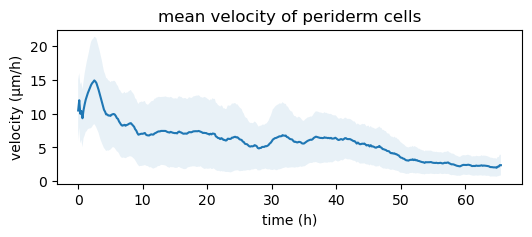

In [42]:
total_t = np.shape(M)[0]
mean_cell_M = np.zeros(total_t)
std_M = np.zeros(total_t)
std_M_g = np.zeros(total_t)
area_per = np.zeros(total_t)
pixel_factor = 0.69 # μm
time_factor = 10/60 # min

for t in range(total_t):
    mean_cell_M[t] = np.sum(M[t])/np.count_nonzero(M[t])
    std_M[t] = np.std(M[t][np.nonzero(M[t])])
    std_M_g[t] = np.std(M[t])
    area_per[t] = np.count_nonzero(M[t])/np.size(M[t])

plt.figure(figsize=(6,2))

# parameter measure fitted values: 
final_mean_vel = mean_cell_M*pixel_factor/time_factor
final_std_vel = std_M*pixel_factor/time_factor


plt.title("mean velocity of periderm cells")
# Mean over cell/IA number.
plt.plot([i*10/60 for i in range(total_t)], final_mean_vel)
plt.fill_between([i*10/60 for i in range(total_t)], final_mean_vel-final_std_vel, final_mean_vel+final_std_vel, alpha=0.1)
plt.xlabel("time (h)")
plt.ylabel("velocity (μm/h)")
plt.savefig("mean_velocity", bbox_inches = "tight", dpi=300)

'''
plt.title("filled area")
plt.plot([i*10/60 for i in range(total_t)], area_per)
plt.xlabel("time (h)")
plt.ylabel("percentage")
plt.savefig("filled_area", bbox_inches = "tight", dpi=300)
'''

plt.show()

# Different representations of the arrows

## The original figure

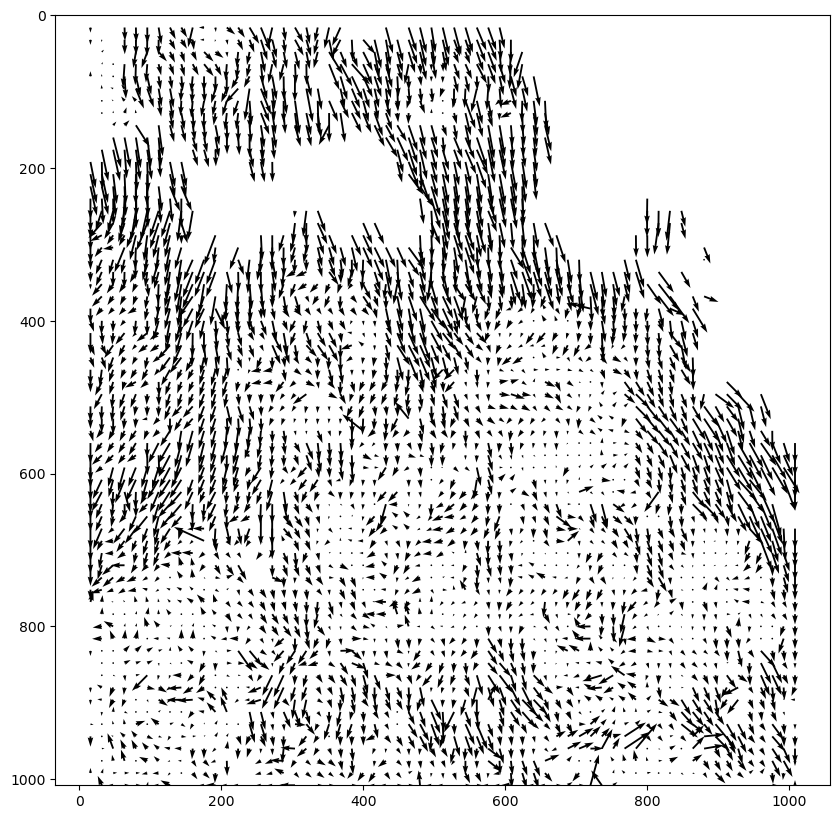

In [27]:
t = 150

plt.figure(figsize=(5, 5))
plt.quiver(xgrid[t], ygrid[t], V[t], -U[t], scale=150)
plt.ylim(max(ygrid[t][1]), 0)
plt.show()

## Coloring the arrows depending on the directions

Attention: the colormap will be considered as circular. The beginning and the end of the color map will be connected to each other --> the arrows that point up have color of the both ends of the colormap while the arrows that point down have color in the middle of the colormap.

Possible to define the own colormap.

In [ ]:
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

x = xgrid[t]
y = ygrid[t]
u = U[t] # y direction.
v = V[t] # x direction.

# Define own color map.
colors = ["gold", "white", "dodgerblue", "white", "gold"]
n_bins = 100
cmap_name = 'direction_color'
self_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

plt.figure(figsize=(5, 5))
plt.gca().invert_yaxis()
plt.quiver(x, y, v, -u, np.arctan2(v, u), pivot="mid",
        scale=150, cmap=self_cmap)
plt.savefig("self_map_direction", dpi=300)

## Coloring the arrows depending on the magnitude

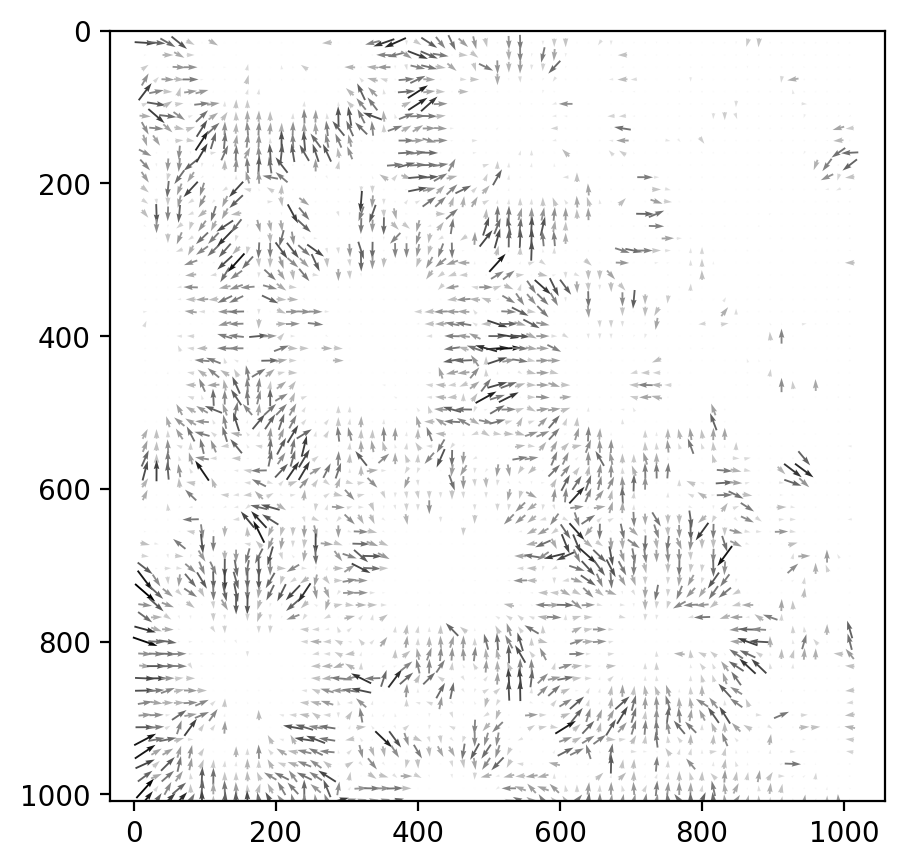

In [20]:
t = 120
plt.figure(figsize=(5, 5), dpi=200)
plt.ylim(max(ygrid[t][1]), 0)
plt.quiver(xgrid[t], ygrid[t], V[t], -U[t], M[t], pivot="mid", cmap='Greys')
#plt.savefig("magnitude_grey", dpi=300)

## Contour plot depending on the magnitude

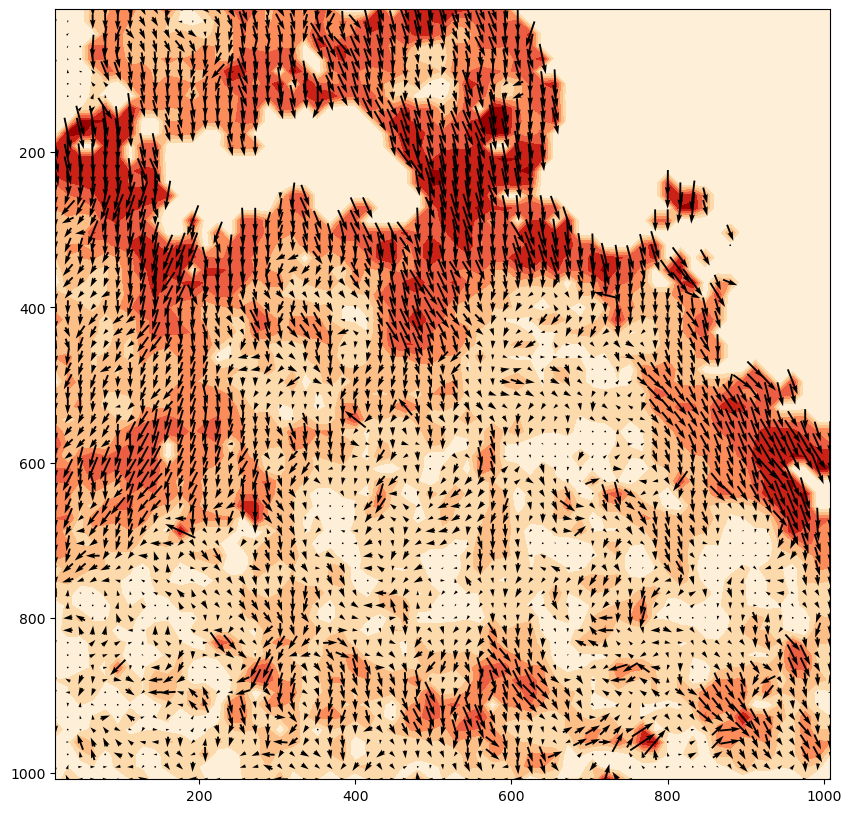

In [35]:
plt.figure(figsize=(5, 5))
plt.gca().invert_yaxis()
plt.contourf(xgrid[t], ygrid[t], M[t], cmap="OrRd")
plt.quiver(xgrid[t], ygrid[t], V[t], -U[t], 
           pivot="mid",scale=150)
#plt.savefig("magnitude_contour_OrRd_witharrow", dpi=300)

## Coloring depending on divergence/Convergence

Do we use the mathematical definition of devergence and rotation?
Can I find some functions doing that?
Covergence perhaps helpfull: https://stackoverflow.com/questions/62084621/how-to-find-convergence-in-vector-field

The divergence of a vectorfield is defined as the sum of gradient of the vector field.
If $F(u, v)$ is a 2D vector field, then the divergence is defined as 

$\operatorname{div}\, \vec{F} = \sum_{i=1}^n\,\frac{\partial F_i}{\partial x_i} = \frac{\partial F_u}{\partial u} + \frac{\partial F_v}{\partial u}$

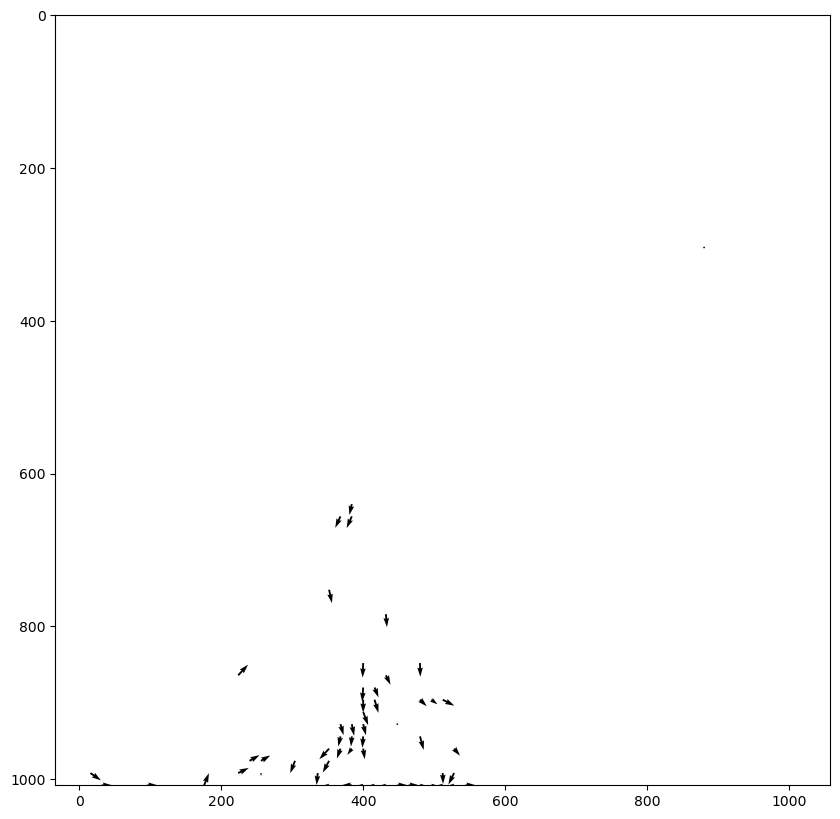

In [49]:
t = 150

plt.figure(figsize=(5, 5))
plt.quiver(xgrid[t], ygrid[t], V[t], -U[t], scale=150)
plt.ylim(max(ygrid[t][1]), 0)
plt.show()

In [19]:
from functools import reduce
t = 90

div = reduce(np.add,np.gradient(U[t])) + reduce(np.add,np.gradient(V[t]))

imgsize = (1024, 1024)
D_mask = np.zeros((imgsize[0], imgsize[1]))
xgrid_t = xgrid[t]
ygrid_t = ygrid[t]

for i in range(np.shape(xgrid_t)[0]):
    for j in range(np.shape(xgrid_t)[1]):
        x = int(xgrid_t[i, j])
        y = int(ygrid_t[i, j])
        local_div = div[i, j]
        D_mask[y-10:y+10, x-10:x+10] = local_div

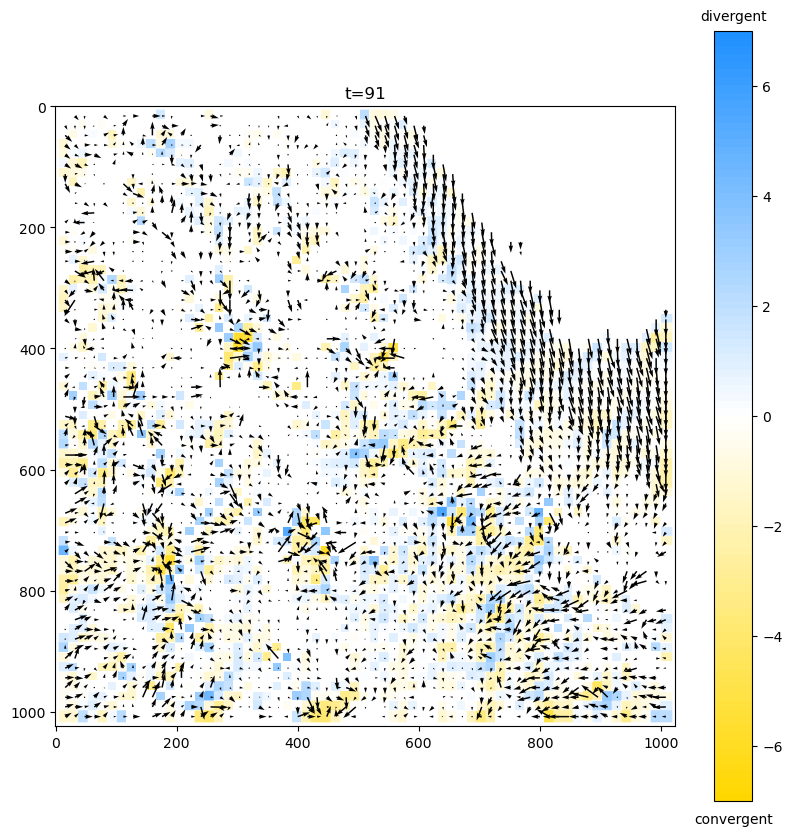

In [20]:
colors_div = ["gold", "white", "dodgerblue"]
n_bins = 100
cmap_name = 'div_color'
self_cmap_div = LinearSegmentedColormap.from_list(cmap_name, colors_div, N=n_bins)


plt.figure(figsize=(5, 5))
plt.imshow(D_mask, cmap = self_cmap_div, vmin=-7, vmax=7)
cbar = plt.colorbar()
cbar.ax.text(0.5, -7.2, "convergent", va="top", ha="center")
cbar.ax.text(0.5, 7.4, "divergent", va="top", ha="center")
plt.quiver(xgrid[t], ygrid[t], V[t], -U[t], scale=150)
plt.title("t="+str(t+1))
plt.show()

Make the frames into video

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
h

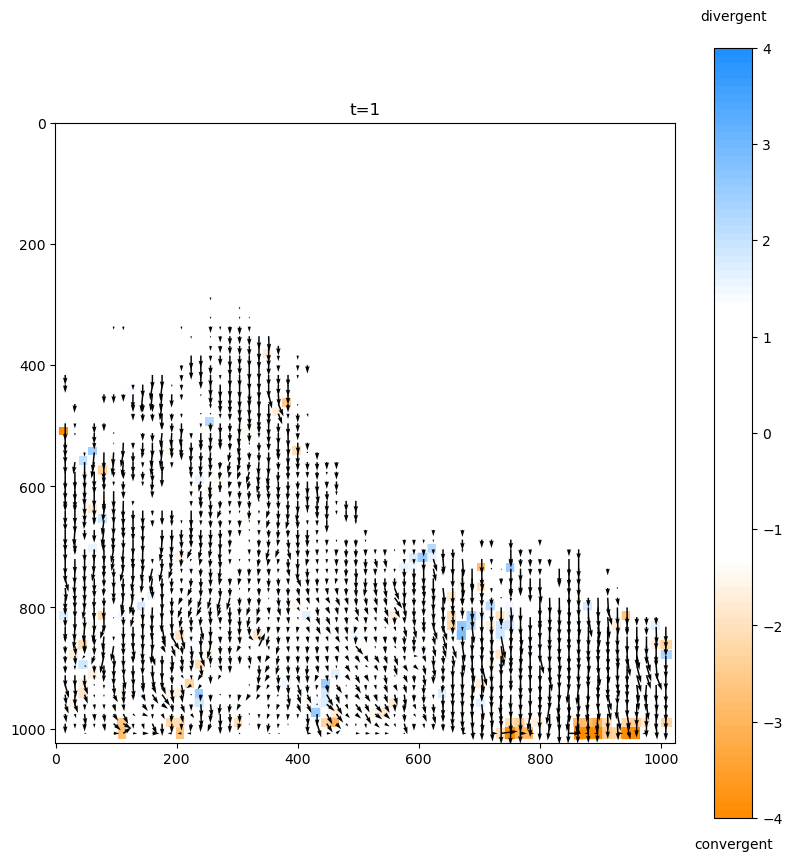

In [9]:
fig = plt.figure(figsize=(5, 5))
imgsize = (1024, 1024)

# self defined cmap
colors_div = ["darkorange", "white", "white", "dodgerblue"]
n_bins = 100
cmap_name = 'div_color'
self_cmap_div = LinearSegmentedColormap.from_list(cmap_name, colors_div, N=n_bins)

# Function for defining 
def make_frame(i):
    plt.clf()
    
    div = reduce(np.add,np.gradient(U[i])) + reduce(np.add,np.gradient(V[i]))

    D_mask = np.zeros((imgsize[0], imgsize[1]))
    xgrid_t = xgrid[i]
    ygrid_t = ygrid[i]

    for m in range(np.shape(xgrid_t)[0]):
        for n in range(np.shape(xgrid_t)[1]):
            x = int(xgrid_t[m, n])
            y = int(ygrid_t[m, n])
            local_div = div[m, n]
            D_mask[y-10:y+10, x-10:x+10] = local_div

    plt.title("t="+str(i+1))
    plt.imshow(D_mask, cmap = self_cmap_div, vmin=-4, vmax=4)
    cbar = plt.colorbar()
    #plt.clim(-7, 7)
    cbar.ax.text(0.5, -4.2, "convergent", va="top", ha="center")
    cbar.ax.text(0.5, 4.4, "divergent", va="top", ha="center")
    plt.quiver(xgrid[i], ygrid[i], V[i], -U[i], scale=150)
    print("hi")

# Making the video
myanim = FuncAnimation(fig, make_frame, frames = np.shape(U)[0]-1, interval = 500)  # frames = np.shape(U)[0]-1
myanim.save("divergence_labeled_avg.mp4", writer="ffmpeg")


# Coloring depending on the vorticity/rotation 

The vorticity (rotation) is defined as the cross product between nabla-operation and the vector field. 

https://en.wikipedia.org/wiki/Vorticity

https://en.wikipedia.org/wiki/Curl_(mathematics)

Python code for vorticity (curl) based on Octave/Matlab implementation (the last post).
https://stackoverflow.com/questions/30378676/calculate-curl-of-a-vector-field-in-python-and-plot-it-with-matplotlib

## Implementing the numerical curl of the vector field.

In [5]:
# Python code based on Octave/matlab. 
# https://stackoverflow.com/questions/30378676/calculate-curl-of-a-vector-field-in-python-and-plot-it-with-matplotlib

def curl(x,y,u,v):
    dx = x[:,0]
    dy = y[0,:]

    _, dFx_dy = np.gradient (u, dx, dy, axis=[1,0])
    dFy_dx, _ = np.gradient (v, dx, dy, axis=[1,0])

    rot_z = dFy_dx - dFx_dy
    
    return rot_z

In [6]:
imgsize = (1024, 1024)
# Alternative 1
def curl_alter1(x, y, u, v, imgsize):
    
    rot = curl(x, y, u, v)
    
    R_mask = np.zeros((imgsize[0], imgsize[1]))
    
    for i in range(np.shape(x)[0]):
        for j in range(np.shape(x)[1]):
            m = int(x[i, j]) # x-axis
            n = int(y[i, j]) # y-axis
            local_rot = rot[i, j]
            R_mask[n-15:n+15, m-15:m+15] = local_rot
    return R_mask

# Alternative 2
def curl_alter2(x, y, u, v, imgsize):
    
    v_size = np.shape(v)[0]
    u_size = np.shape(u)[1]
    rot = np.diff(v, axis=1)[0:v_size-1, :] - np.diff(u, axis=0)[:, 0:u_size-1]
    
    imgsize = (1024, 1024)
    R_mask = np.zeros((imgsize[0], imgsize[1]))
    
    for i in range(np.shape(x)[0]-1):
        for j in range(np.shape(x)[1]-1):
            m = int(x[i, j]) # x-axis
            n = int(y[i, j]) # y-axis
            local_rot = rot[i, j]
            R_mask[n-15:n+15, m-15:m+15] = local_rot
    return R_mask

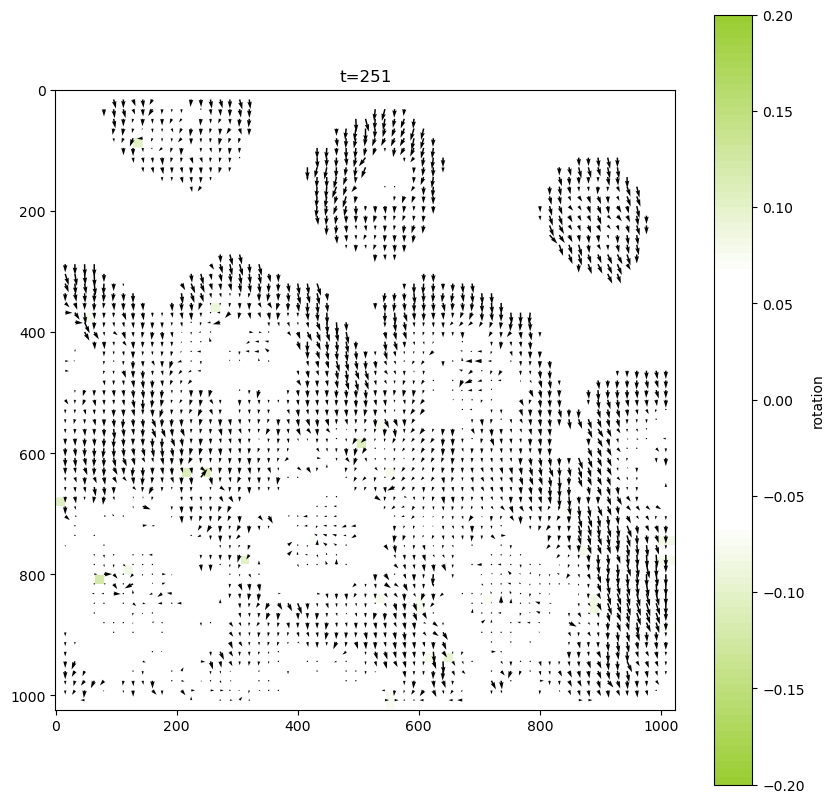

In [15]:
t = 250

colors_rot = ["yellowgreen", "white", "white", "yellowgreen"] # Rotation in both directions.
n_bins = 100
cmap_name = 'rot_color'
self_cmap_rot = LinearSegmentedColormap.from_list(cmap_name, colors_rot, N=n_bins)

R_mask = curl_alter1(xgrid[t], ygrid[t], U[t], V[t], imgsize)

plt.figure(figsize=(5, 5))
plt.title("t="+str(t+1))
plt.imshow(R_mask, cmap = self_cmap_rot, vmin=-0.2, vmax=0.2)
plt.colorbar(label = "rotation")
plt.quiver(xgrid[t], ygrid[t], V[t], -U[t], scale=150)

Make the rotation frames (in both direction together) into video

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
h

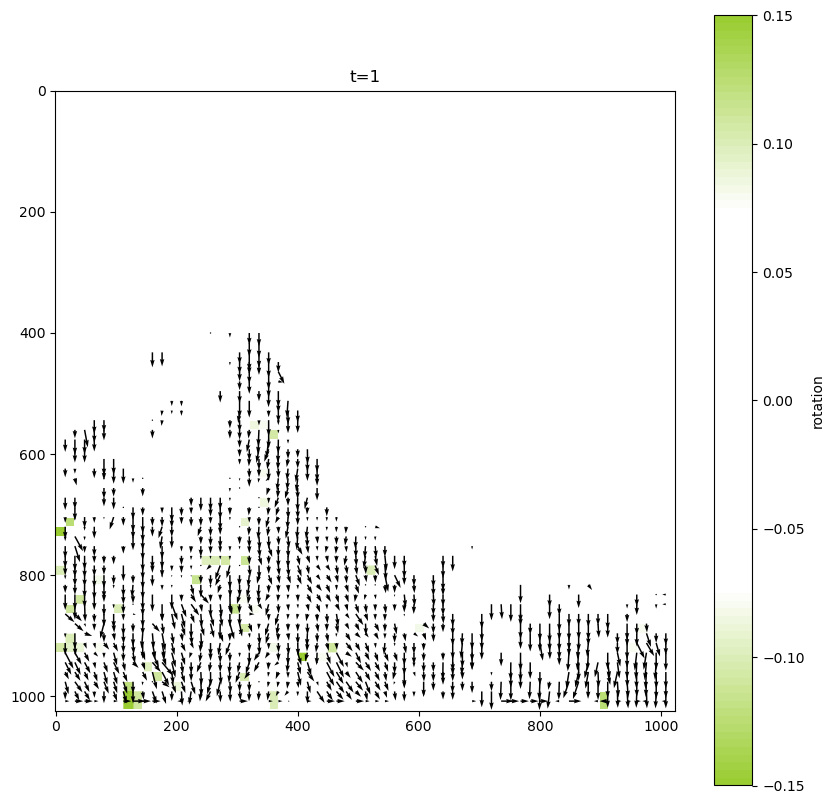

In [7]:
fig = plt.figure(figsize=(5, 5))
imgsize = (1024, 1024)

# self defined cmap
colors_rot = ["yellowgreen", "white", "white", "white", "yellowgreen"] # Rotation in both directions.
n_bins = 100
cmap_name = 'rot_color'
self_cmap_rot = LinearSegmentedColormap.from_list(cmap_name, colors_rot, N=n_bins)

# Function for defining 
def make_frame_rot(i):
    plt.clf()
    
    R_mask = curl_alter1(xgrid[i], ygrid[i], U[i], V[i], imgsize)

    plt.title("t="+str(i+1))
    plt.imshow(R_mask, cmap = self_cmap_rot, vmin=-0.15, vmax=0.15)
    plt.colorbar(label = "rotation")
    plt.quiver(xgrid[i], ygrid[i], V[i], -U[i], scale=150)
    print("hi")

# Making the video
myanim = FuncAnimation(fig, make_frame_rot, frames = np.shape(U)[0]-1, interval = 500)  # frames = np.shape(U)[0]-1
# myanim.save("rotaion_both_dir.gif", writer="pillow")
myanim.save("rotaion_both_dir_avg.mp4", writer="ffmpeg") # Save the video as mp4

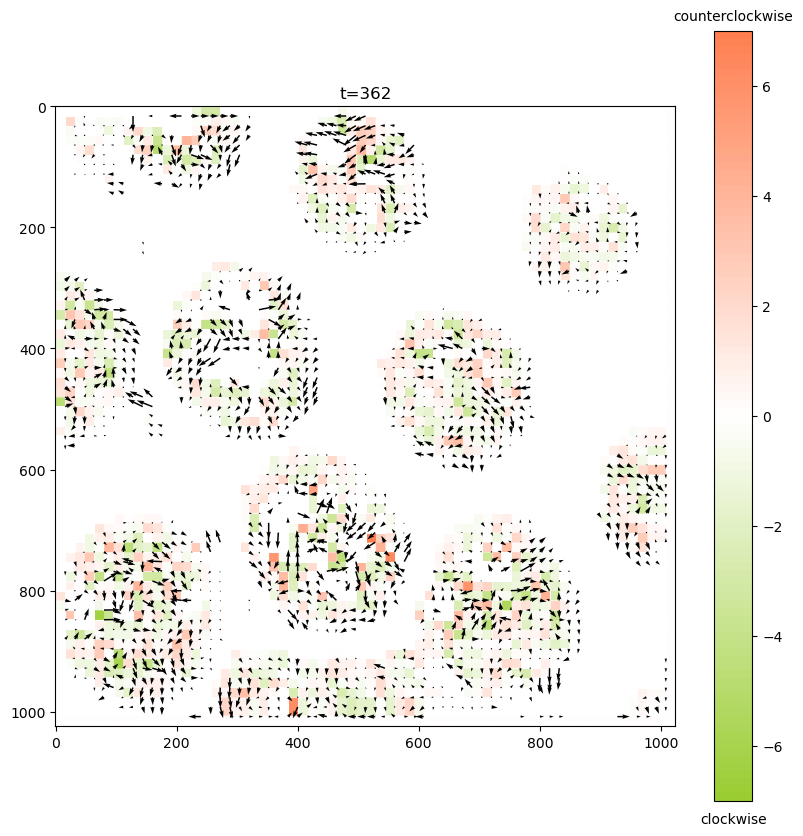

In [58]:
colors_rot_2 = ["yellowgreen",  "white", "coral"] # Rotation distinguishing between clockwise and conterclockwise.
n_bins = 100
cmap_name = 'rot_color_2'
self_cmap_rot_2 = LinearSegmentedColormap.from_list(cmap_name, colors_rot_2, N=n_bins)

plt.figure(figsize=(5, 5))
plt.title("t="+str(t+1))
plt.imshow(R_mask, cmap = self_cmap_rot_2, vmin=-7, vmax=7)
cbar = plt.colorbar()
cbar.ax.text(0.5, -7.2, "clockwise", va="top", ha="center")
cbar.ax.text(0.5, 7.4, "counterclockwise", va="top", ha="center")
plt.quiver(xgrid[t], ygrid[t], V[t], -U[t], scale=150)

Make the rotation (distinguish between rotation directions) frames into video

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
h

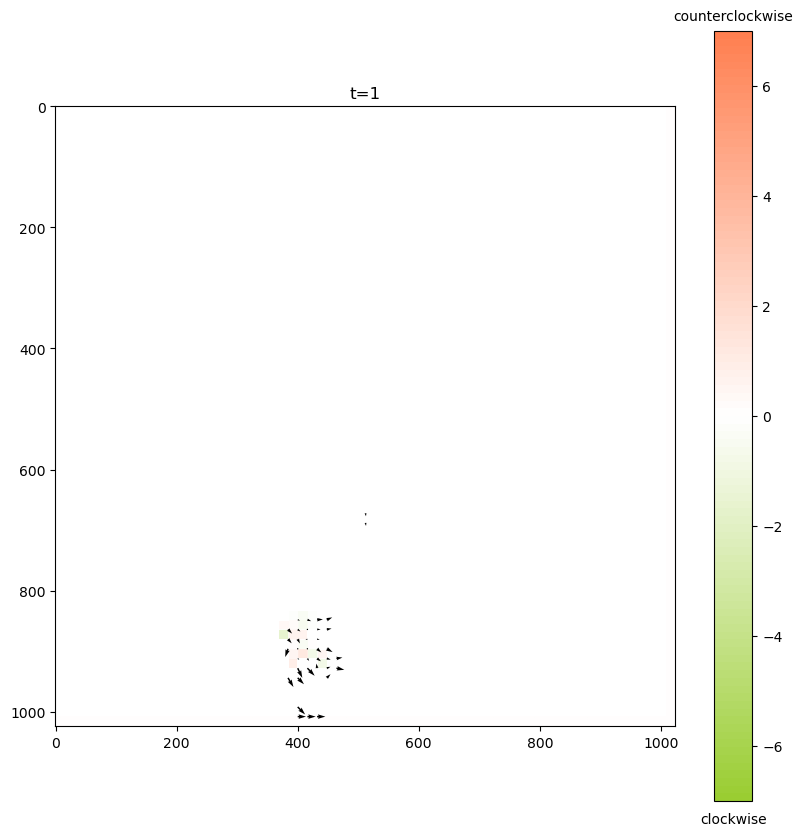

In [69]:
fig = plt.figure(figsize=(5, 5))
imgsize = (1024, 1024)

# self defined cmap
colors_rot_2 = ["yellowgreen",  "white", "coral"] # Rotation distinguishing between clockwise and conterclockwise.
n_bins = 100
cmap_name = 'rot_color_2'
self_cmap_rot_2 = LinearSegmentedColormap.from_list(cmap_name, colors_rot_2, N=n_bins)

# Function for defining 
def make_frame_rot_2(i):
    plt.clf()
    
    v_size = np.shape(V[i])[0]
    u_size = np.shape(U[i])[1]

    # Definition of rotation.
    rot = np.diff(V[i], axis=1)[0:v_size-1, :] - np.diff(U[i], axis=0)[:, 0:u_size-1]
    
    R_mask = np.zeros((imgsize[0], imgsize[1]))
    xgrid_t = xgrid[i]
    ygrid_t = ygrid[i]
    
    for m in range(np.shape(xgrid_t)[0]-1):
        for n in range(np.shape(xgrid_t)[1]-1):
            x = int(xgrid_t[m, n])
            y = int(ygrid_t[m, n])
            local_rot = rot[m, n]
            R_mask[y-15:y+15, x-15:x+15] = local_rot

    plt.title("t="+str(i+1))
    plt.imshow(R_mask, cmap = self_cmap_rot_2, vmin=-7, vmax=7)
    cbar = plt.colorbar()
    cbar.ax.text(0.5, -7.2, "clockwise", va="top", ha="center")
    cbar.ax.text(0.5, 7.4, "counterclockwise", va="top", ha="center")
    plt.quiver(xgrid[i], ygrid[i], V[i], -U[i], scale=150)
    print("hi")

# Making the video
myanim = FuncAnimation(fig, make_frame_rot_2, frames = np.shape(U)[0]-1, interval = 500)  # frames = np.shape(U)[0]-1
# myanim.save("rotaion_both_dir.gif", writer="pillow")
myanim.save("rotaion_both_dir_2.mp4", writer="ffmpeg") # Save the video as mp4

# Streamline plot

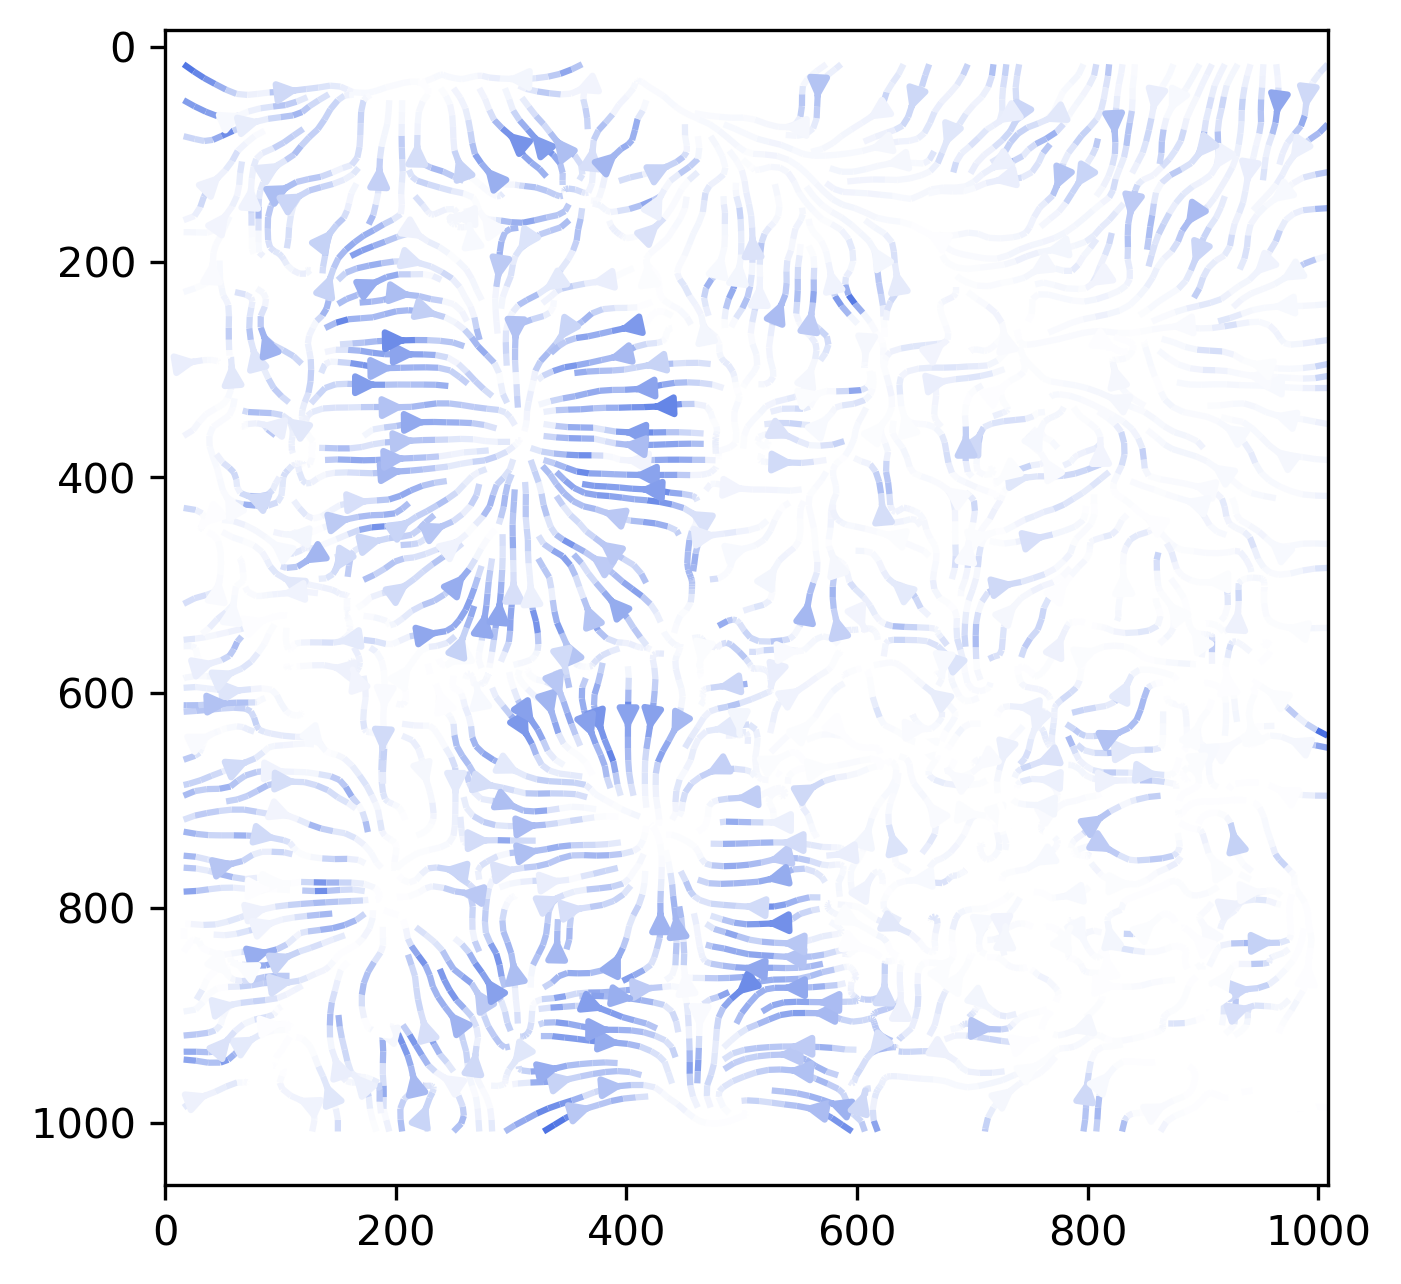

In [5]:
colors = ["white", "royalblue"]
n_bins = 100
cmap_name = 'cmap'
self_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
t = 50

fig = plt.figure(figsize=(5, 5), dpi=300)

base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(-90)

plt.streamplot(ygrid[t], xgrid[t], U[t], V[t], density=3, color=M[t], transform= rot + base, cmap=self_cmap)

plt.yticks([0, -200, -400, -600, -800, -1000], [0, 200, 400, 600, 800, 1000])
plt.xticks([0, 200, 400, 600, 800, 1000], [0, 200, 400, 600, 800, 1000])
#plt.gca().invert_yaxis()
#plt.colorbar()
plt.savefig("streamline_test")
plt.show()

### Streamline plot overlap with divergence heatmap

In [5]:
def normalize_vector_field(t, U, V, M): 
    # Magnitude of the vectors. 
    M_t = M[t]
    M_t[M_t == 0] = np.nan

    U_t = U[t]
    V_t = V[t]

    U_t_nor = U_t / M_t 
    V_t_nor = V_t / M_t 

    # Turn the nan to 0.
    U_t_nor[np.isnan(U_t_nor)] = 0
    V_t_nor[np.isnan(V_t_nor)] = 0

    return U_t_nor, V_t_nor

In [6]:
def divergence_matrix(t, U, V, M, xgrid, ygrid): 
    # Use the normalized vectorfield 
    U_nor, V_nor = normalize_vector_field(t, U, V, M)
    
    div = reduce(np.add,np.gradient(U_nor)) + reduce(np.add,np.gradient(V_nor))

    #div = reduce(np.add,np.gradient(U[t])) + reduce(np.add,np.gradient(V[t]))
    
    imgsize = (1024, 1024)
    D_mask = np.zeros((imgsize[0], imgsize[1]))
    xgrid_t = xgrid[t]
    ygrid_t = ygrid[t]
    
    for i in range(np.shape(xgrid_t)[0]):
        for j in range(np.shape(xgrid_t)[1]):
            x = int(xgrid_t[i, j])
            y = int(ygrid_t[i, j])
            local_div = div[i, j]
            D_mask[y-15:y+15, x-15:x+15] = local_div

    # Replace the posisitions has nan divergence with 0. 
    D_mask[np.isnan(D_mask)] = 0
    
    return D_mask

In [18]:
import seaborn as sns

# Colormap for divergence. 
colors_div = ["darkorange", "white", "white", "dodgerblue"]
n_bins = 100
cmap_name = 'div_color'
self_cmap_div = LinearSegmentedColormap.from_list(cmap_name, colors_div, N=n_bins)

# Colormap for streamline plot (velocity)
colors = ["white", "black"]
n_bins = 100
cmap_name = 'cmap'
self_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Time point for the figures. 
t = 100


# plt.imshow(D_mask, cmap = self_cmap_div, vmin=-7, vmax=7)
# cbar = plt.colorbar()
# cbar.ax.text(0.5, -7.2, "convergent", va="top", ha="center")
# cbar.ax.text(0.5, 7.4, "divergent", va="top", ha="center")
# plt.quiver(xgrid[t], ygrid[t], V[t], -U[t], scale=150)
# plt.title("t="+str(t+1))
# plt.show()

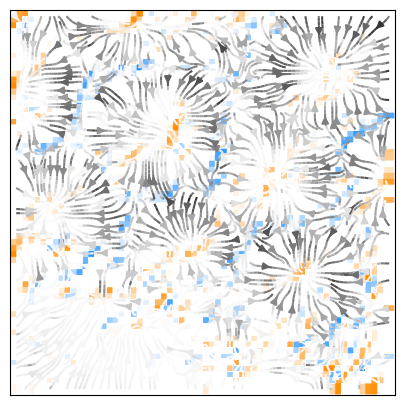

In [19]:
plt.figure(figsize=(5, 5))
# base = plt.gca().transData
# rot = transforms.Affine2D().rotate_deg(270)
im = plt.imshow(divergence_matrix(t, U, V, M, xgrid, ygrid).T, cmap = self_cmap_div, vmin = -2.5, vmax = 2.5)#, transform=rot+base)
#plt.colorbar(im,fraction=0.046, pad=0.04)
plt.streamplot(ygrid[t], xgrid[t], U[t], V[t], density=3, color=M[t], cmap=self_cmap)#, transform=rot+base)
#plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])
plt.savefig("streamline_light_color", bbox_inches="tight", dpi = 300)
plt.show()

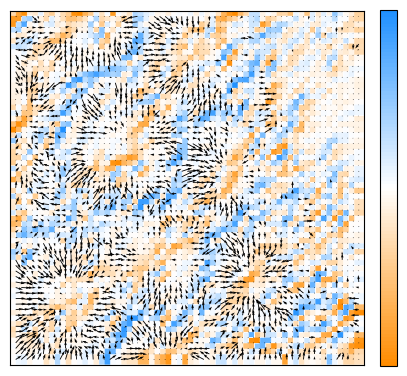

In [17]:
plt.figure(figsize=(5, 5))

plt.quiver(xgrid[t], ygrid[t], V[t], -U[t])
im = plt.imshow(divergence_matrix(t, U, V, M, xgrid, ygrid), cmap = self_cmap_div, vmin = -2.5, vmax = 2.5)
cbar = plt.colorbar(im,fraction=0.046, pad=0.04)
cbar.set_ticks([])
plt.xticks([])
plt.yticks([])
plt.savefig("convergence_strong_color", bbox_inches="tight", dpi = 300)
plt.show()

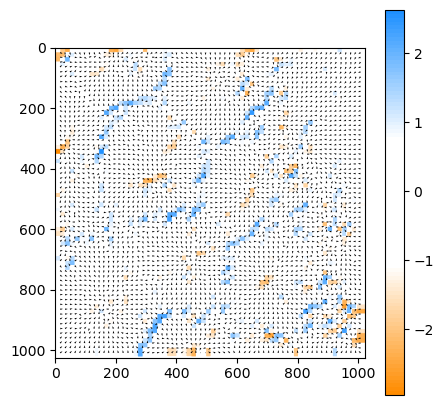

In [15]:
plt.figure(figsize=(5, 5))

U_nor, V_nor = normalize_vector_field(t, U, V, M)
plt.quiver(xgrid[t], ygrid[t], V_nor, -U_nor)
plt.imshow(divergence_matrix(t, U, V, M, xgrid, ygrid), cmap = self_cmap_div)
plt.colorbar()
plt.show()

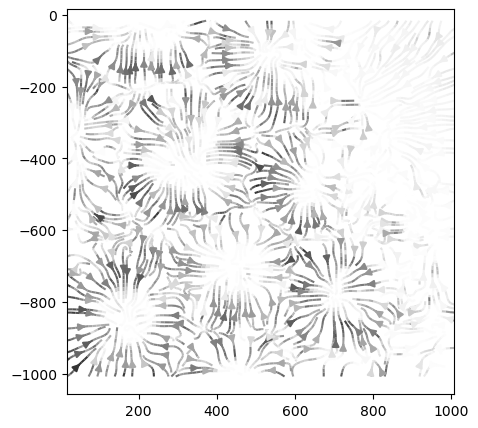

In [12]:
plt.figure(figsize=(5, 5))

base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(-90)

plt.streamplot(ygrid[t], xgrid[t], U[t], V[t], density=3, color=M[t], transform= rot + base, cmap=self_cmap)
plt.show()

### Making video for streamline plot. But very long run time!

In [ ]:
# # from matplotlib import transforms
# # import matplotlib as mpl
# # from matplotlib.colors import LinearSegmentedColormap
# # Very very long run time!

# fig = plt.figure(figsize=(5, 5))

# # define the color map
# colors = ["white", "royalblue"]
# n_bins = 100
# cmap_name = 'cmap'
# self_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# y = ygrid[0]
# x = xgrid[0]

# def make_frame(i): 
#     plt.clf()

#     # Rotation of the streamline plot.
#     base = plt.gca().transData
#     rot = transforms.Affine2D().rotate_deg(-90)

#     plt.streamplot(y, x, U[i], V[i], density=3, color=M[t], transform= rot + base, cmap=self_cmap)
#     plt.yticks([0, -200, -400, -600, -800, -1000], [0, 200, 400, 600, 800, 1000])
#     plt.xticks([0, 200, 400, 600, 800, 1000], [0, 200, 400, 600, 800, 1000])
#     print(i)

# # Making the video
# myanim = FuncAnimation(fig, make_frame, frames = np.shape(U)[0]-1, interval = 500)  # frames = np.shape(U)[0]-1
# # myanim.save("rotaion_both_dir.gif", writer="pillow")
# myanim.save("streamline_whole_image.mp4", writer="ffmpeg") # Save the video as mp4